In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [29]:
# Observing train data
print(train.shape)
print(test.shape)
train.head()

(1458644, 11)
(625134, 9)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [30]:
# Observing test data
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [31]:
# Checking if there are any missing values
train.isnull().sum(axis = 0)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [32]:
# Creating a new distance variable
train['dist'] = np.sqrt(np.square(train['pickup_longitude'] - train['dropoff_longitude']) + np.square(train['pickup_latitude'] - train['dropoff_latitude']))
test['dist'] = np.sqrt(np.square(test['pickup_longitude'] - test['dropoff_longitude']) + np.square(test['pickup_latitude'] - test['dropoff_latitude']))    

In [33]:
train['vendor_id'] = train['vendor_id'].astype(np.int32)
train['passenger_count'] = train['passenger_count'].astype(np.int32)

test['vendor_id'] = test['vendor_id'].astype(np.int32)
test['passenger_count'] = test['passenger_count'].astype(np.int32)
train.drop(['dropoff_datetime'], axis = 1, inplace = True)

In [34]:
train["pickup_datetime"] = (pd.to_datetime(train["pickup_datetime"], format="%Y-%m-%d %H:%M:%S"))
test["pickup_datetime"] = (pd.to_datetime(test["pickup_datetime"], format="%Y-%m-%d %H:%M:%S"))

In [35]:
# Creating new variables to account for time dependency
train['weekday'] = train['pickup_datetime'].apply(lambda x: x.weekday())
train['day'] = train['pickup_datetime'].apply(lambda x: x.day)
train['hour'] = train['pickup_datetime'].apply(lambda x: x.hour)
train['month'] = train['pickup_datetime'].apply(lambda x: x.month)


test['weekday'] = test['pickup_datetime'].apply(lambda x: x.weekday())
test['day'] = test['pickup_datetime'].apply(lambda x: x.day)
test['hour'] = test['pickup_datetime'].apply(lambda x: x.hour)
test['month'] = test['pickup_datetime'].apply(lambda x: x.month)

In [36]:
train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist,weekday,day,hour,month
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.017680,0,14,17,3
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.020456,6,12,0,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.059934,1,19,11,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.013438,2,6,19,4
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.010690,5,26,13,3


In [37]:
train['weekday'] = train['weekday'].astype(np.int32)
train['day'] = train['day'].astype(np.int32)
train['hour'] = train['hour'].astype(np.int32)
train['month'] = train['month'].astype(np.int32)


test['weekday'] = test['weekday'].astype(np.int32)
test['day'] = test['day'].astype(np.int32)
test['hour'] = test['hour'].astype(np.int32)
test['month'] = test['month'].astype(np.int32)

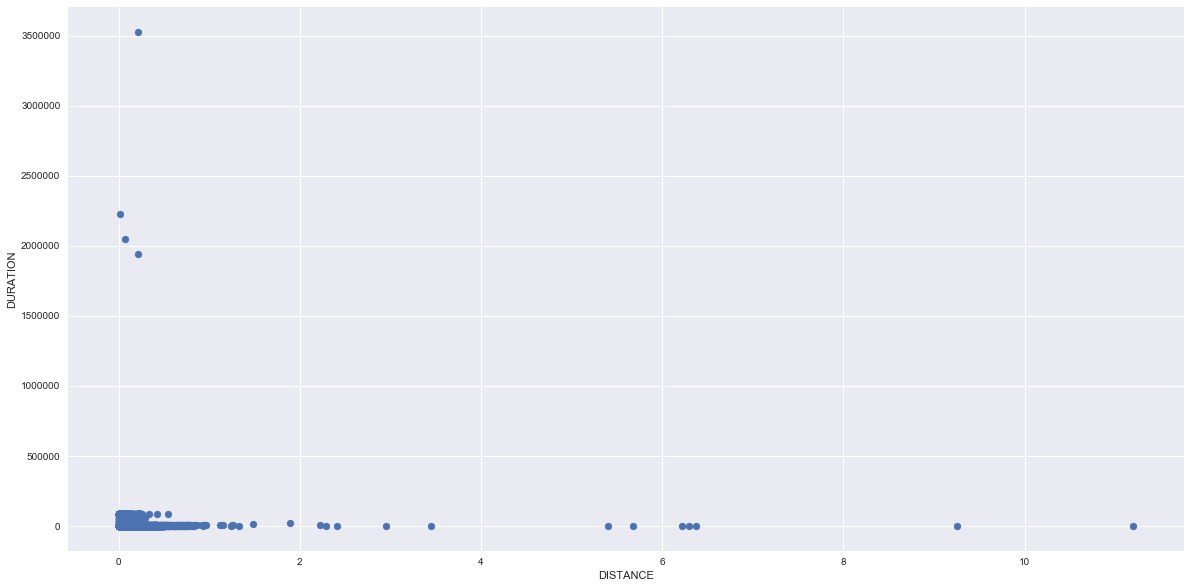

In [38]:
# Distance vs Trips
plt.figure(figsize = (20, 10))
plt.scatter(train['dist'], train['trip_duration'])
plt.xlabel('DISTANCE')
plt.ylabel('DURATION')
plt.show()

In [39]:
# Lets distance variable by using more accurate distances
import math
R = 6371
def distance(lon1, lon2, lat1, lat2):
    rlat1 = np.radians(lat1)
    rlat2 = np.radians(lat2)
    rlon1 = np.radians(lon1)
    rlon2 = np.radians(lon2)
    dlat = rlat2 - rlat1
    dlon = rlon2 - rlon1
    a = np.square(np.sin(dlat/2)) + np.cos(rlat1)*np.cos(rlat2)*np.square(np.sin(dlon/2))
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R*c
    return d
train['dist'] = distance(train['pickup_longitude'], train['dropoff_longitude'], train['pickup_latitude'], train['dropoff_latitude'])
test['dist'] = distance(test['pickup_longitude'], test['dropoff_longitude'], test['pickup_latitude'], test['dropoff_latitude'])

In [40]:
train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist,weekday,day,hour,month
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521,0,14,17,3
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507,6,12,0,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098,1,19,11,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498,2,6,19,4
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588,5,26,13,3


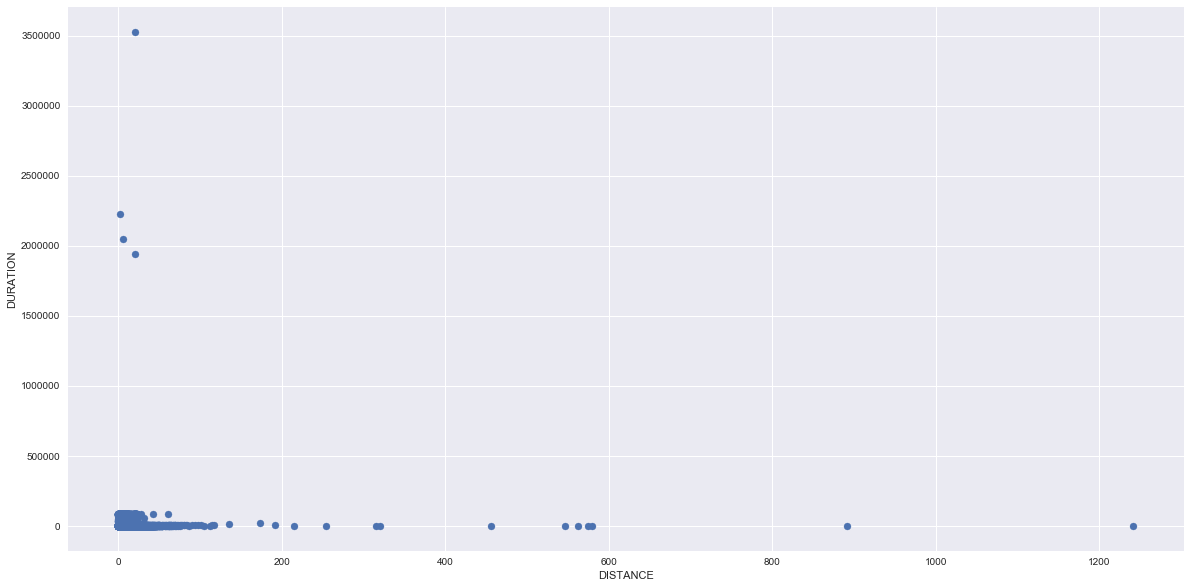

In [41]:
# Lets now plot the graph again to see if there is any correlation between Distance and Trip duration
plt.figure(figsize = (20, 10))
plt.scatter(train['dist'], train['trip_duration'])
plt.xlabel('DISTANCE')
plt.ylabel('DURATION')
plt.show()

- It may seem that the graph didn't change much but now we have accurate distances. 

In [42]:
# Its better to drop a few columns id, pickup_datetime 
train.drop(['id', 'pickup_datetime'], axis = 1, inplace = True)
test.drop(['id', 'pickup_datetime'], axis = 1, inplace = True)

In [43]:
# Encoding
train['store_and_fwd_flag'] = 1*(train['store_and_fwd_flag'] == 'Y')
test['store_and_fwd_flag'] = 1*(test['store_and_fwd_flag'] == 'Y')

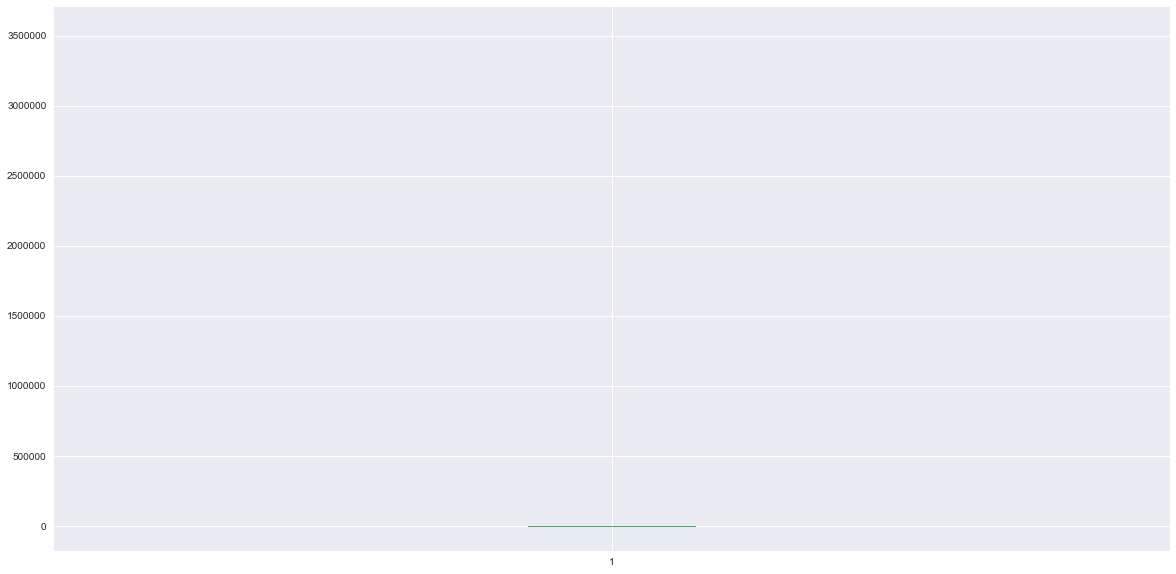

In [44]:
# Checking outliers 
plt.figure(figsize = (20, 10))
plt.boxplot(train['trip_duration'])
plt.show()

In [45]:
# So its better to remove any trip duration greater than 500000
train = train[train['trip_duration'] < 500000]

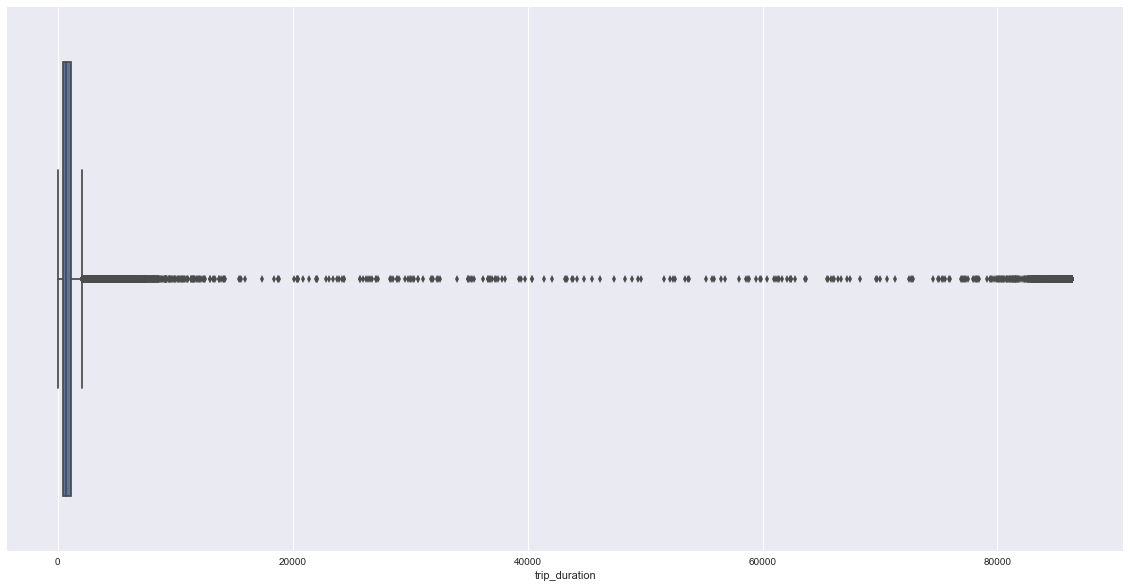

In [46]:
# Plotting the box plot again
plt.figure(figsize = (20, 10))
sns.boxplot(train['trip_duration'])
plt.show()

In [47]:
print((train['trip_duration'] < 1000).sum())
print((train['trip_duration'] >= 1000).sum())
print(train['trip_duration'].mean())

1044399
414241
952.8152518784622


 - Though the mean and inter quartile range is much less than thousand there is a significant amount of data more than that. This is the benefit of having such large amount of data

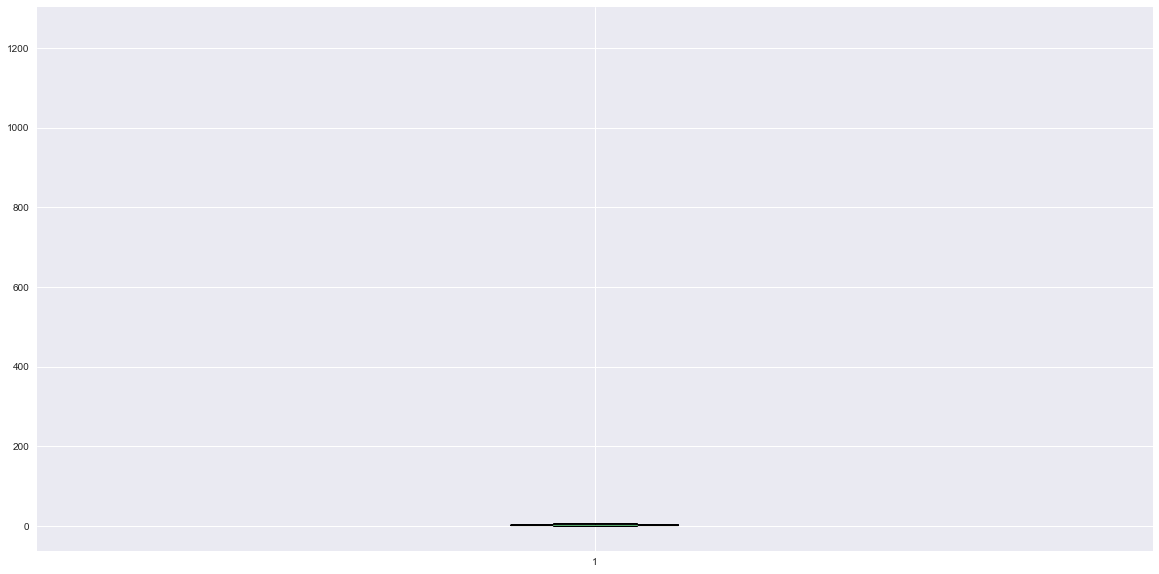

In [48]:
# Box plot for distance
plt.figure(figsize = (20, 10))
plt.boxplot(train['dist'], 1)
plt.show()

In [49]:
print((train['dist'] < 1200).sum())
print((train['dist'] >= 1200).sum())
print(train['trip_duration'][train['dist'] >= 1200])
print(train['dist'][train['dist'] >= 1200])

1458639
1
184925    792
Name: trip_duration, dtype: int64
184925    1240.908677
Name: dist, dtype: float64


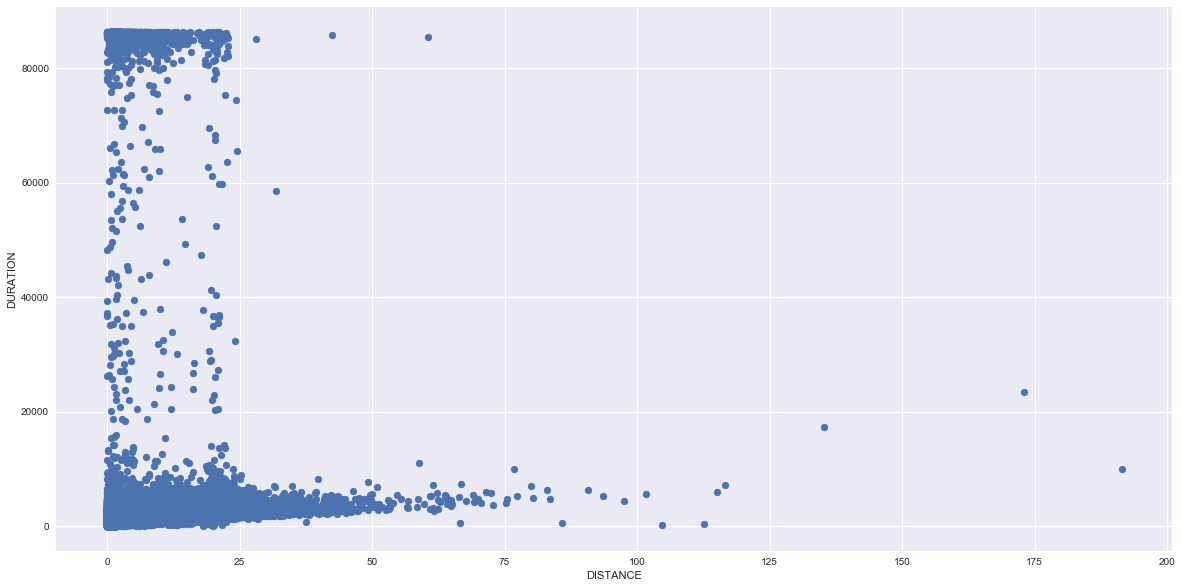

In [50]:
# Lets now plot the graph again
plt.figure(figsize = (20, 10))
plt.scatter(train['dist'][train['dist'] < 200], train['trip_duration'][train['dist'] < 200])
plt.xlabel('DISTANCE')
plt.ylabel('DURATION')
plt.show()

** Similar plots for other features to check which features are more important**

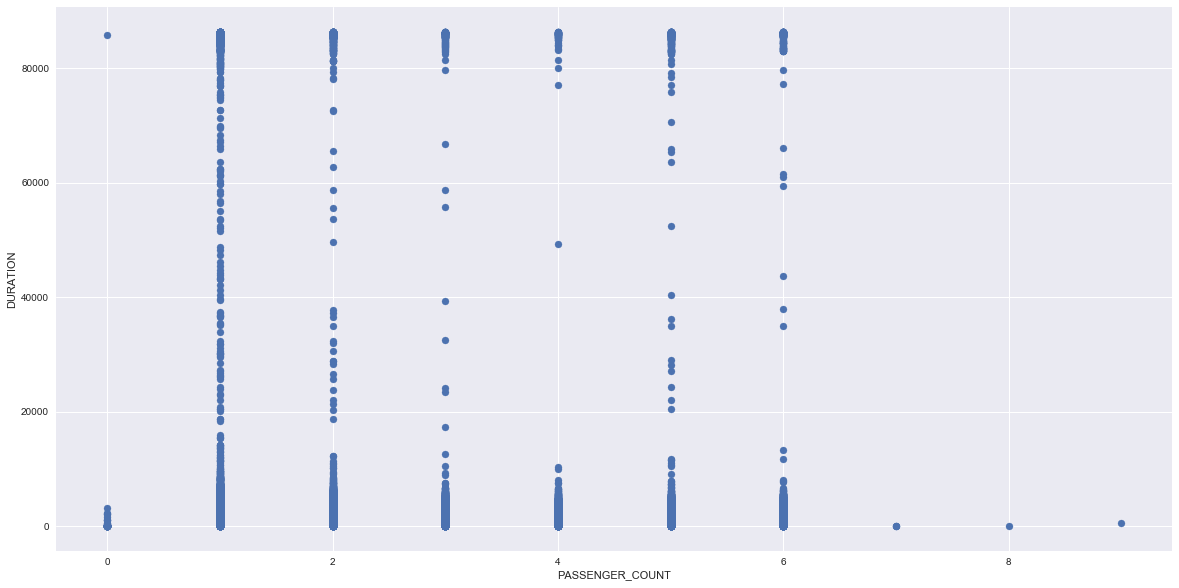

In [51]:
plt.figure(figsize = (20, 10))
plt.scatter(train['passenger_count'], train['trip_duration'])
plt.xlabel('PASSENGER_COUNT')
plt.ylabel('DURATION')
plt.show()

 - It can be seen that there is no clear relation b/w trip duration and passenger count

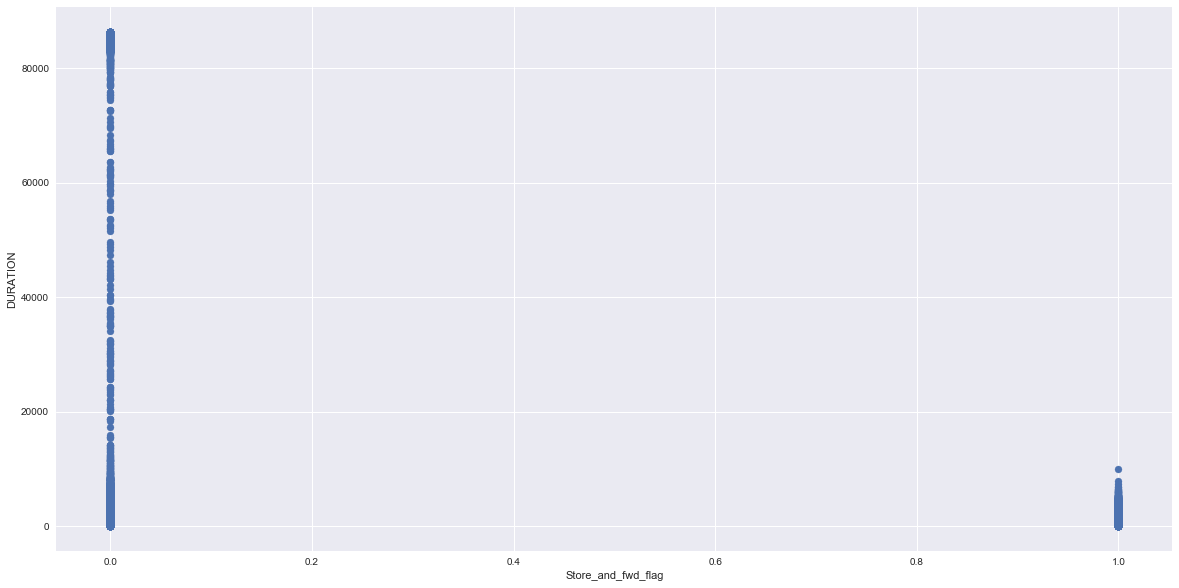

In [52]:
plt.figure(figsize = (20, 10))
plt.scatter(train['store_and_fwd_flag'], train['trip_duration'])
plt.xlabel('Store_and_fwd_flag')
plt.ylabel('DURATION')
plt.show()

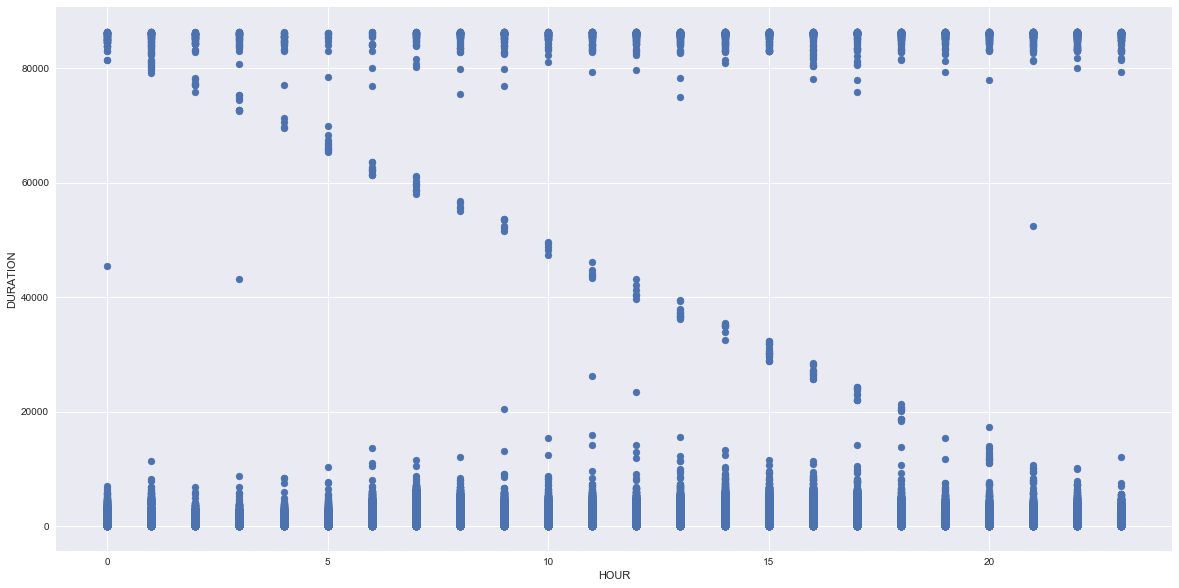

In [54]:
plt.figure(figsize = (20, 10))
plt.scatter(train['hour'], train['trip_duration'])
plt.xlabel('HOUR')
plt.ylabel('DURATION')
plt.show()

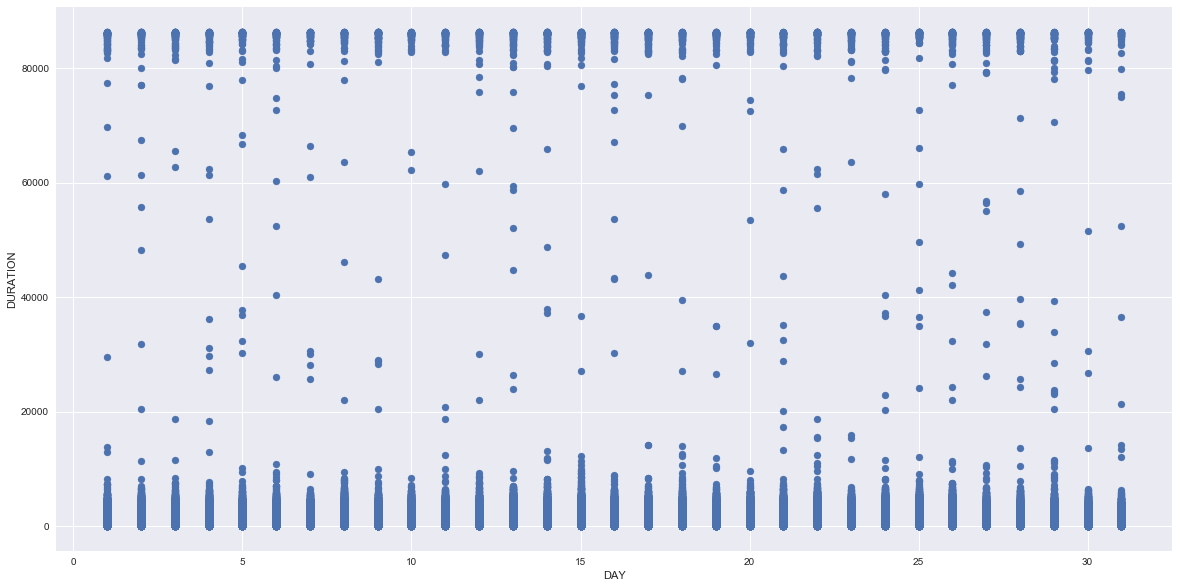

In [55]:
plt.figure(figsize = (20, 10))
plt.scatter(train['day'], train['trip_duration'])
plt.xlabel('DAY')
plt.ylabel('DURATION')
plt.show()

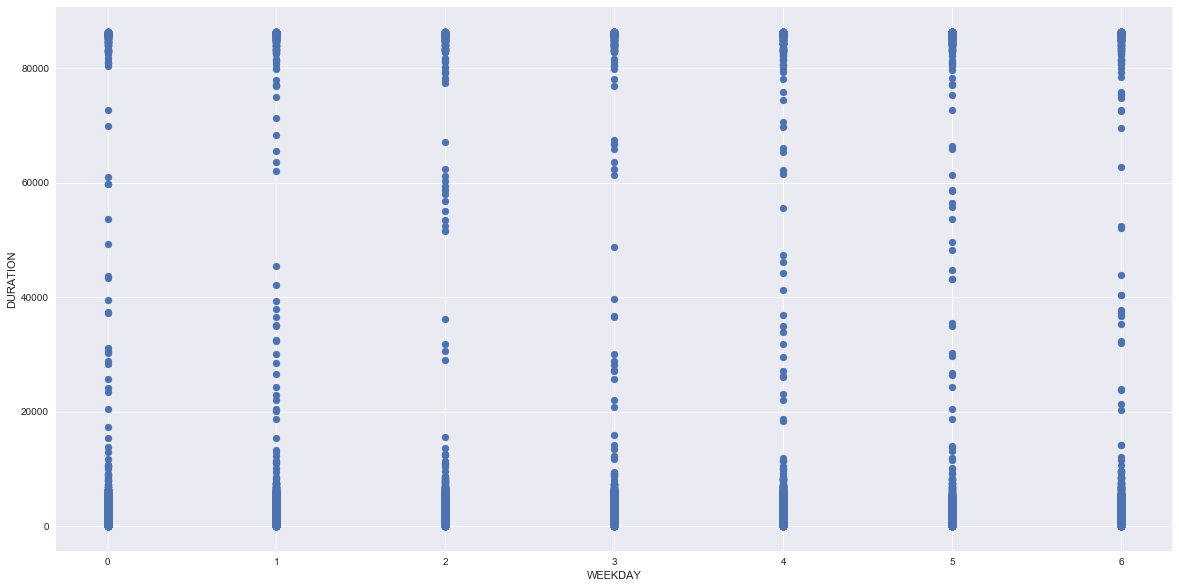

In [56]:
plt.figure(figsize = (20, 10))
plt.scatter(train['weekday'], train['trip_duration'])
plt.xlabel('WEEKDAY')
plt.ylabel('DURATION')
plt.show()

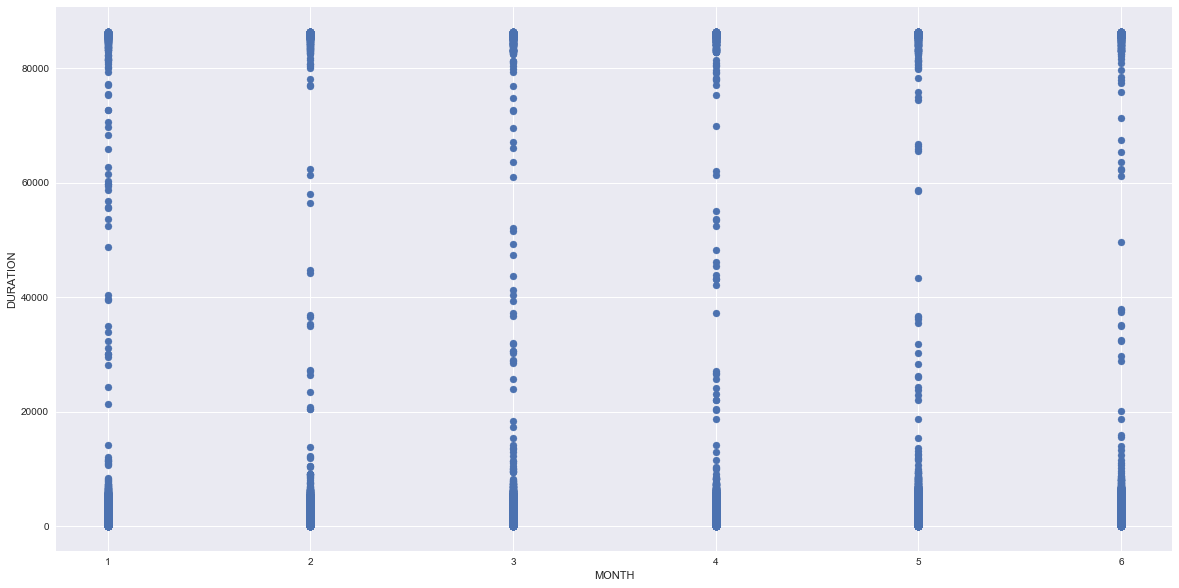

In [57]:
plt.figure(figsize = (20, 10))
plt.scatter(train['month'], train['trip_duration'])
plt.xlabel('MONTH')
plt.ylabel('DURATION')
plt.show()

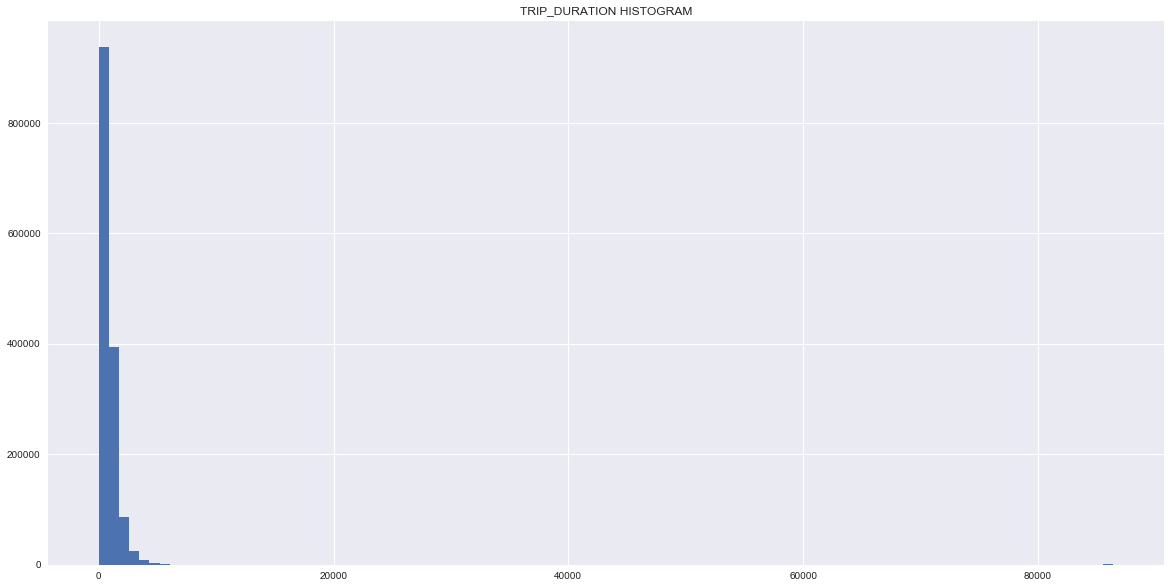

In [58]:
# Trip duration distribution before log transformation
plt.figure(figsize = (20, 10))
plt.hist(train['trip_duration'], bins = 100)
plt.title('TRIP_DURATION HISTOGRAM')
plt.show()

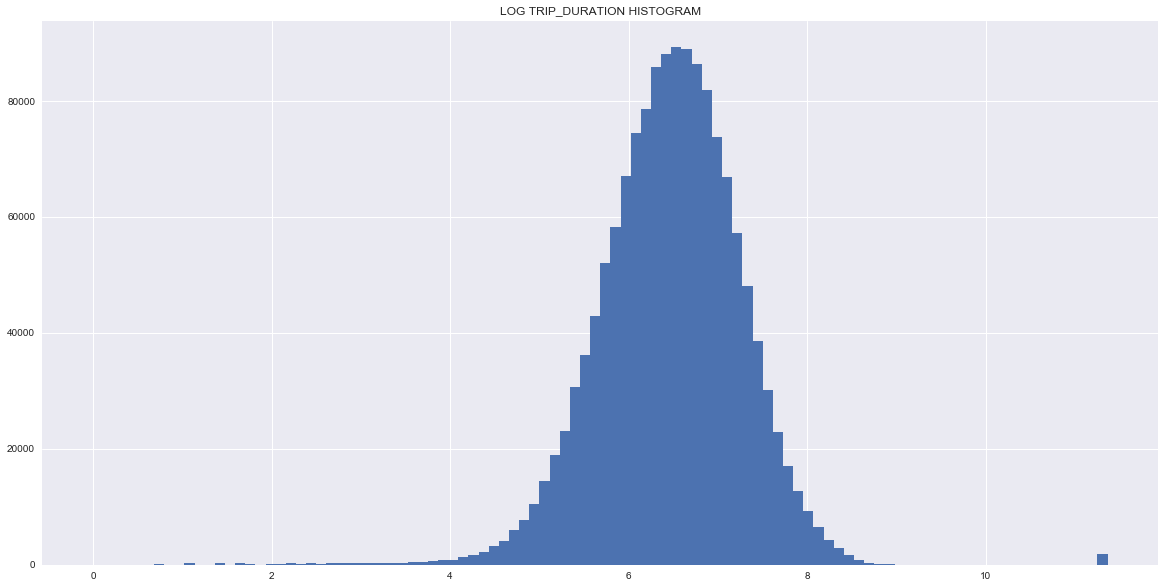

In [59]:
# Trip duration distribution after log transformation
plt.figure(figsize = (20, 10))
plt.hist(np.log(train['trip_duration']), bins = 100)
plt.title('LOG TRIP_DURATION HISTOGRAM')
plt.show()

In [60]:
train['trip_duration'] = np.log(train['trip_duration'])

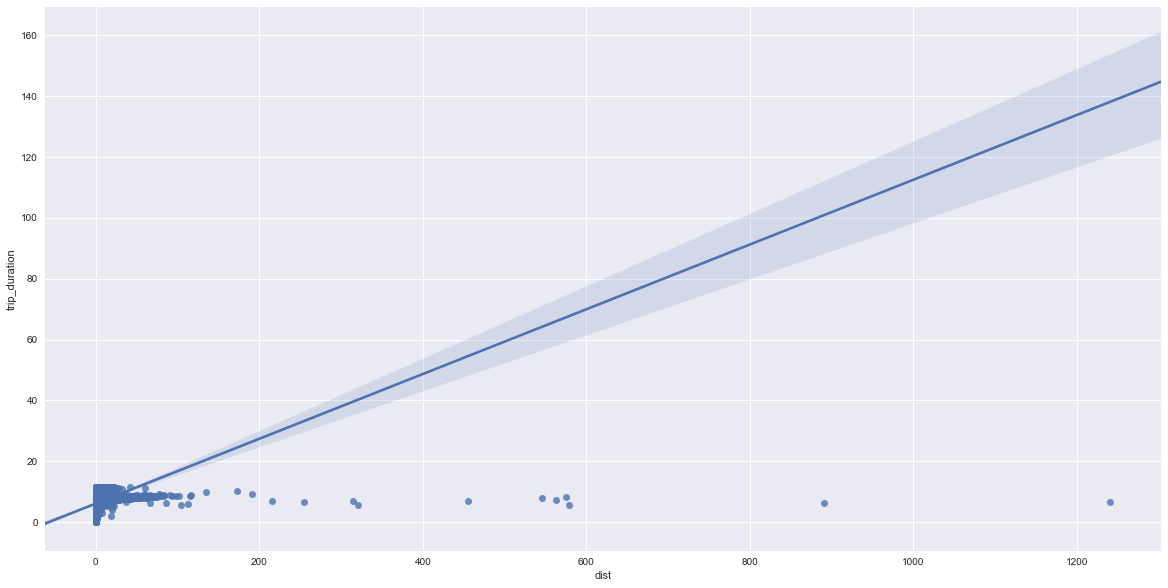

In [61]:
# A reg plot Distance Vs Trip_Duration
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.regplot(train['dist'], train['trip_duration'])

In [62]:
target = train['trip_duration']
train.drop(['trip_duration'], axis = 1, inplace = True)

** Its time to start building a machine learning model. **
 - I want to use following models
    - 1. Linear Regression
    - 2. XGBoost

In [63]:
# first let me start by spliting data into train and test splits
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(train, target, test_size = 0.2, random_state = 42)

In [64]:
# Making RMLSE score function
def scorer(log_act, log_pred):
    act = np.exp(log_act) + 1
    pred = np.exp(log_pred) + 1
    n = act.shape[0]
    error = np.sqrt(np.sum(np.square(np.log(pred) - np.log(act)))/n)
    return error

In [65]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = True)
reg.fit(Xtrain, ytrain)
ypred = reg.predict(Xtest)
error_score = scorer(ytest, ypred)
print('RMLSE error score is ', error_score)

RMLSE error score is  0.65277795144


** RMLSE score obtained was 0.65, Now I will try to use XGBoost model and tune parameters to obtain a lower RMLSE score**


In [70]:
# Cross validation using Grid Search Cv
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
cv = KFold(n_splits = 5, shuffle = True)

score = make_scorer(scorer, greater_is_better = False)

params_grid = {'max_depth': [3, 4], 'n_estimators': [200, 400], 'learning_rate': [1, 2]}
gridsearch = GridSearchCV(estimator=XGBRegressor(silent = 1), param_grid = params_grid, scoring = score, cv = cv, n_jobs = -1)

gridsearch.fit(Xtrain, ytrain)

print("RMLSE error score is: {0}".format(-1*gridsearch.best_score_))
print("Parameters:")
for key, value in gridsearch.best_params_.items():
    print("\t{}: {}".format(key, value))


RMLSE error score is: 0.41347305017925773
Parameters:
	learning_rate: 1
	max_depth: 4
	n_estimators: 400


In [72]:
# Creating an XGB regression model using the optimal parameters found and checking it on test data.
reg = XGBRegressor(n_estimators = 400, silent = 1, max_depth = 4, learning_rate = 1, nthread = -1)
reg.fit(Xtrain, ytrain)
ypred_xgb = reg.predict(Xtest)
error = scorer(ytest, ypred_xgb)
print("Error obtained: {0}".format(error))

Error obtained: 0.414863556961241


 ----------------------------------------------------------
 - This xgboost model gave much improved performance compared to linear model, but this is not the best model which can be obtained.
 - Inorder to learn and apply how a model can be imporoved using efficient feature engineering I took the help of a wonderful kaggle kernel by Belgua a top kaggler.

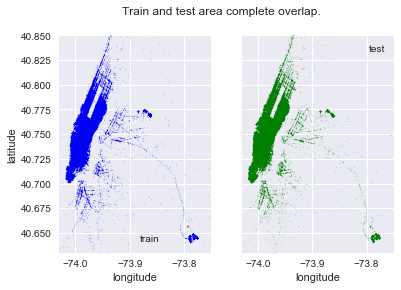

In [78]:
long_border = (-74.03, -73.75)
lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_longitude'].values[:100000], train['pickup_latitude'].values[:100000],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values[:100000], test['pickup_latitude'].values[:100000],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(lat_border)
plt.xlim(long_border)
plt.show()

**FEATURE EXTRACTION**
using PCA

In [79]:
from sklearn.decomposition import PCA

coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values,
                    test[['pickup_latitude', 'pickup_longitude']].values,
                    test[['dropoff_latitude', 'dropoff_longitude']].values))
pca = PCA().fit(coords)

train['pickup_pca0'] = pca.transform(train[['pickup_latitude', 'pickup_longitude']])[:, 0]
train['pickup_pca1'] = pca.transform(train[['pickup_latitude', 'pickup_longitude']])[:, 1]
train['dropoff_pca0'] = pca.transform(train[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
train['dropoff_pca1'] = pca.transform(train[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
test['pickup_pca0'] = pca.transform(test[['pickup_latitude', 'pickup_longitude']])[:, 0]
test['pickup_pca1'] = pca.transform(test[['pickup_latitude', 'pickup_longitude']])[:, 1]
test['dropoff_pca0'] = pca.transform(test[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
test['dropoff_pca1'] = pca.transform(test[['dropoff_latitude', 'dropoff_longitude']])[:, 1]


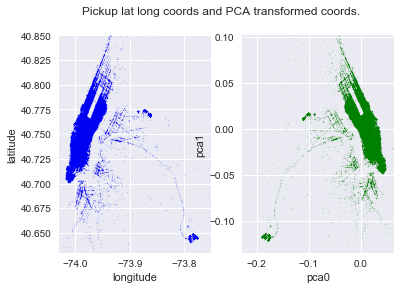

In [81]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(train['pickup_longitude'].values[:100000], train['pickup_latitude'].values[:100000], color='blue', s=1, alpha=0.1)
ax[1].scatter(train['pickup_pca0'].values[:100000], train['pickup_pca1'].values[:100000], color='green', s=1, alpha=0.1)
fig.suptitle('Pickup lat long coords and PCA transformed coords.')
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('pca0')
ax[1].set_ylabel('pca1')
ax[0].set_xlim(long_border)
ax[0].set_ylim(lat_border)
pca_borders = pca.transform([[x, y] for x in lat_border for y in long_border])
ax[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())
plt.show()

In [83]:
# Adding more distance metrics
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

train['distance_haversine'] = haversine_array(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
train['distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
train['direction'] = bearing_array(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
train['pca_manhattan'] = np.abs(train['dropoff_pca1'] - train['pickup_pca1']) + np.abs(train['dropoff_pca0'] - train['pickup_pca0'])

test['distance_haversine'] = haversine_array(test['pickup_latitude'], test['pickup_longitude'], test['dropoff_latitude'], test['dropoff_longitude'])
test['distance_dummy_manhattan'] = dummy_manhattan_distance(test['pickup_latitude'], test['pickup_longitude'], test['dropoff_latitude'], test['dropoff_longitude'])
test['direction'] = bearing_array(test['pickup_latitude'], test['pickup_longitude'], test['dropoff_latitude'], test['dropoff_longitude'])
test['pca_manhattan'] = np.abs(test['dropoff_pca1'] - test['pickup_pca1']) + np.abs(test['dropoff_pca0'] - test['pickup_pca0'])

train['center_latitude'] = (train['pickup_latitude'] + train['dropoff_latitude']) / 2
train['center_longitude'] = (train['pickup_longitude'] + train['dropoff_longitude']) / 2
test['center_latitude'] = (test['pickup_latitude'] + test['dropoff_latitude']) / 2
test['center_longitude'] = (test['pickup_longitude'] + test['dropoff_longitude']) / 2


In [85]:
# Additional datetime features

train['week_hour'] = train['weekday']*24 + train['hour']

test['week_hour'] = test['weekday']*24 + train['hour']


**---------------------------------------------------------------------**
There are other data additional resoursces available which can be used in expanding data but it requires huge compute power to deal with such large data.

So I am training with all the above data to see it there is an impovement in the performance

In [101]:

Xtrain, Xtest, ytrain, ytest = train_test_split(train, target, test_size = 0.2, random_state = 42)

In [97]:
Xtrain.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,day,hour,...,pickup_pca1,dropoff_pca0,dropoff_pca1,distance_haversine,distance_dummy_manhattan,direction,pca_manhattan,center_latitude,center_longitude,week_hour
273748,2,1,-73.958038,40.783237,-73.975510,40.760853,False,0,25,13,...,0.030913,0.001473,0.009592,2.891365,3.960061,-149.407524,0.040076,40.772045,-73.966774,13
552572,2,1,-73.991768,40.744045,-73.990845,40.749451,False,4,12,5,...,-0.006233,0.017450,-0.000891,0.606066,0.678827,7.372002,0.006581,40.746748,-73.991306,101
1205402,2,1,-73.990181,40.728340,-73.983177,40.742500,False,5,9,13,...,-0.022004,0.010204,-0.008279,1.681487,2.164710,20.542855,0.021547,40.735420,-73.986679,133
617624,1,1,-73.986023,40.747868,-73.990074,40.729572,False,2,27,1,...,-0.002754,0.017847,-0.020780,2.062778,2.375617,-170.474330,0.023143,40.738720,-73.988049,49
1412255,2,2,-73.958435,40.764500,-73.969833,40.760269,False,1,26,15,...,0.012231,-0.004159,0.008676,1.069045,1.430365,-116.101961,0.015181,40.762384,-73.964134,39


In [98]:
# I am increasing n_estimators parameter because there is an increase in no of features.
reg = XGBRegressor(n_estimators = 800, silent = 1, max_depth = 4, learning_rate = 1, nthread = -1)
reg.fit(Xtrain, ytrain)
ypred_xgb = reg.predict(Xtest)
error = scorer(ytest, ypred_xgb)
print("Error obtained: {0}".format(error))

Error obtained: 0.41218347677563405


-------------------------------------
** It may look like only a slight improvement, by tuning parameters using GridSearchCV and by taking advantage of additional data sets the accuracy can be improved upto 0.37, but it requires a lot of compute power. **